In [1]:
import sys
sys.path.append('/Users/w5b0h0/Desktop/gradient normalization/gradient normalization')

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from algorithms import AsynSGD
# from utils.util import create_fresh_models
from utils import Client, Server, create_fresh_models, plot_accuracy_comparison, plot_loss_comparison
from model import LogisticRegressionBinary, MLP, ResNet, resnet18
from data import split_doubly_stochastic_direct, get_mnist_dataset, get_cifar10_dataset, get_mnist_binary_dataset, split_dirichlet
from torchvision import datasets, transforms


import random
seed=26
random.seed(seed)
torch.manual_seed(seed)

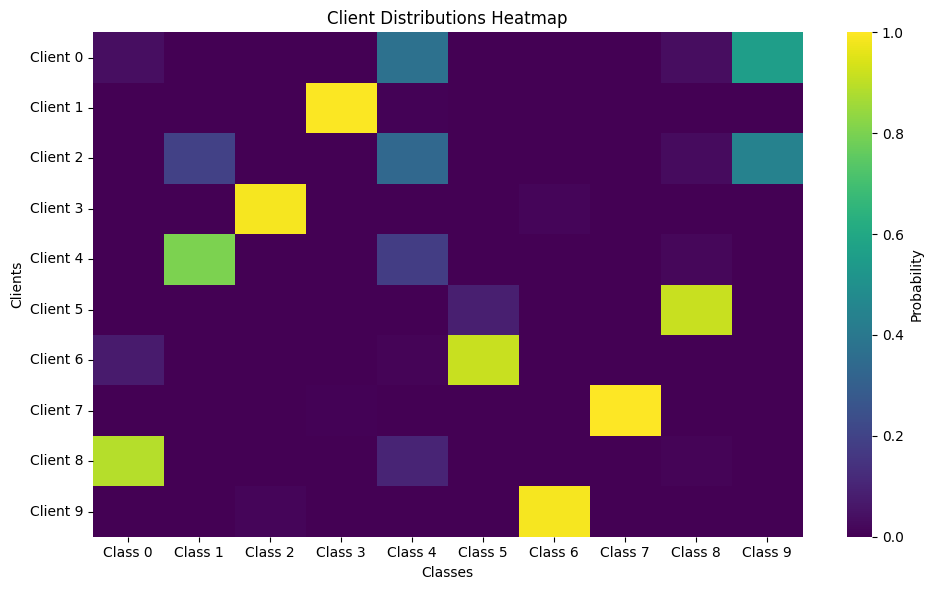

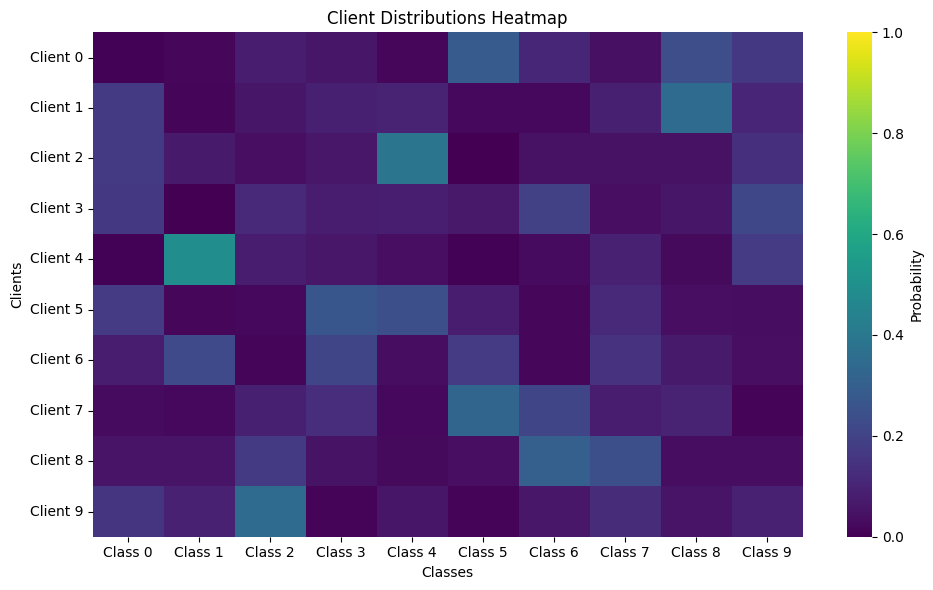

array([[0.0068596 , 0.0171115 , 0.07457097, 0.05627893, 0.01706255,
        0.2815607 , 0.1078001 , 0.04214289, 0.23498061, 0.16163218],
       [0.16640697, 0.01560969, 0.05595348, 0.08688312, 0.09535924,
        0.02074683, 0.02142975, 0.08684777, 0.34753367, 0.10322946],
       [0.16852961, 0.07015017, 0.0361364 , 0.0600675 , 0.38725713,
        0.00138893, 0.04655825, 0.04571026, 0.04547301, 0.1387288 ],
       [0.16201368, 0.00148205, 0.11218434, 0.07914473, 0.08417841,
        0.06261815, 0.19311611, 0.03683597, 0.05673355, 0.21169305],
       [0.00646215, 0.48474142, 0.08155432, 0.06108787, 0.03901942,
        0.00682493, 0.02993064, 0.09173354, 0.02420594, 0.17443974],
       [0.17526259, 0.01736807, 0.01987535, 0.26716882, 0.23949946,
        0.07995287, 0.01748165, 0.11216138, 0.0384796 , 0.03275018],
       [0.07803845, 0.22637528, 0.0140663 , 0.20492597, 0.03268245,
        0.1750868 , 0.0192658 , 0.14256273, 0.06822816, 0.03876797],
       [0.03047656, 0.02117612, 0.0891222

In [2]:
train_dataset, test_dataset = get_cifar10_dataset()

num_clients = 10
num_classes = 10
alpha1 = 0.1
alpha2 = 10

dataset_list3, client_distribution3 = split_doubly_stochastic_direct(train_dataset, alpha1, num_clients, num_classes)
dataset_list4, client_distribution4 = split_doubly_stochastic_direct(train_dataset, alpha2, num_clients, num_classes)


batch_size = 512

client_device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
server_device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=512, shuffle=True)

from utils import visualize_client_distributions

visualize_client_distributions(client_distribution3)

visualize_client_distributions(client_distribution4)

In [3]:
loss_results = {}
acc_results = {}
record_interval ={}

In [4]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
# gamma = 0.01
inner_lr = 0.001
algo_name = "AsySGD-GN-M"
gamma_to_test=[0.5]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                          batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
    
        
    algorithm = AsynSGD(clients,server,theta,algo_name)
    loss, acc = algorithm.asysgd(iteration,criterion,gamma,inner_iter,record_interval=10)

    loss_results[algo_name] = loss
    acc_results[algo_name] = acc

0.5
AsySGD-GN-M 0.0
tensor([[0.4285],
        [0.4075],
        [0.3514],
        [0.0344],
        [0.1669],
        [0.9351],
        [0.3804],
        [1.0734],
        [1.2366],
        [0.1916]])
tensor([[-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.1979],
        [-1.0000,  0.0000,  1.1172],
        [-1.0000,  0.0000,  1.0000]])
AsySGD-GN-M Round 0: Loss = 5.5845, Accuracy = 10.00%
AsySGD-GN-M Round 10: Loss = 5.9008, Accuracy = 10.38%
AsySGD-GN-M Round 20: Loss = 4.3170, Accuracy = 10.00%
AsySGD-GN-M Round 30: Loss = 5.2205, Accuracy = 10.98%
AsySGD-GN-M Round 40: Loss = 5.4613, Accuracy = 10.00%
AsySGD-GN-M Round 50: Loss = 3.9336, Accuracy = 10.00%
AsySGD-GN-M Round 60: Loss = 3.2244, Accuracy = 10.74%
AsySGD-GN-M Round 70: Loss = 2.8171, Accurac

In [5]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
# gamma = 0.01
inner_lr = 0.001
algo_name = "AsySGD"
gamma_to_test=[0.05]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                          batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
    
        
    algorithm = AsynSGD(clients,server,theta,algo_name)
    loss, acc = algorithm.asysgd(iteration,criterion,gamma,inner_iter,record_interval=10)
    loss_results[algo_name] = loss
    acc_results[algo_name] = acc


0.05
AsySGD 0.0
tensor([[0.4285],
        [0.4075],
        [0.3514],
        [0.0344],
        [0.1669],
        [0.9351],
        [0.3804],
        [1.0734],
        [1.2366],
        [0.1916]])
tensor([[-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.1979],
        [-1.0000,  0.0000,  1.1172],
        [-1.0000,  0.0000,  1.0000]])
AsySGD Round 0: Loss = 12.4960, Accuracy = 10.00%
AsySGD Round 10: Loss = 10.4579, Accuracy = 10.00%
AsySGD Round 20: Loss = 2.3168, Accuracy = 13.86%
AsySGD Round 30: Loss = 2.2835, Accuracy = 14.95%
AsySGD Round 40: Loss = 2.2821, Accuracy = 15.47%
AsySGD Round 50: Loss = 2.2553, Accuracy = 15.20%
AsySGD Round 60: Loss = 2.3040, Accuracy = 15.77%
AsySGD Round 70: Loss = 2.2544, Accuracy = 15.28%
AsySGD Round 80: Loss = 2.2526,

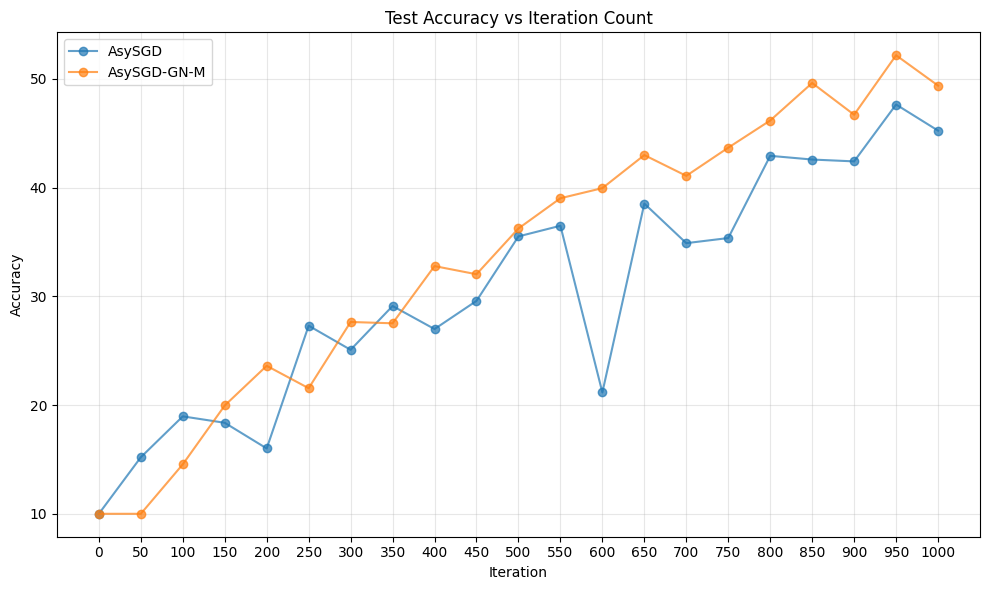

In [6]:
import matplotlib.pyplot as plt
import numpy as np
figsize=(10, 6)
title='Test Accuracy vs Iteration Count'
acc_results

plt.figure(figsize=figsize)
interval = 5

x = np.arange(0,len(acc_results["AsySGD"])*10,10*interval)

# plt.plot(x, acc_results["QSGD u=1"][::interval], '-o', label="QSGD", alpha=0.7)
plt.plot(x, acc_results["AsySGD"][::interval], '-o', label="AsySGD", alpha=0.7)
plt.plot(x, acc_results["AsySGD-GN-M"][::interval], '-o', label="AsySGD-GN-M", alpha=0.7)
# plt.plot(np.arange(0,len(acc_results["EF21-SGDM"]),2*interval), acc_results["QSGD-GN-M u=2"][::interval], '-o', label="QSGD-GN-M u=2", alpha=0.7)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
gamma = 0.01
inner_lr = 0.001

algorithms_to_test = [ "AsySGD-GN-M","AsySGD"]

loss_results = {}
acc_results = {}
grad_norm_results = {}

for algo_name in algorithms_to_test:
    
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                          batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
    
        
    algorithm = AsynSGD(clients,server,theta,algo_name)
    loss, acc = algorithm.asysgd(iteration,criterion,gamma,inner_iter,record_interval=10)

    loss_results[algo_name] = loss
    acc_results[algo_name] = acc


AsySGD-GN-M 0.0
tensor([[0.4285],
        [0.4075],
        [0.3514],
        [0.0344],
        [0.1669],
        [0.9351],
        [0.3804],
        [1.0734],
        [1.2366],
        [0.1916]])
tensor([[-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.1979],
        [-1.0000,  0.0000,  1.1172],
        [-1.0000,  0.0000,  1.0000]])
AsySGD-GN-M Round 0: Loss = 2.3917, Accuracy = 9.96%


AsySGD-GN-M Round 10: Loss = 2.3974, Accuracy = 10.00%
AsySGD-GN-M Round 20: Loss = 2.3152, Accuracy = 13.32%
AsySGD-GN-M Round 30: Loss = 2.3300, Accuracy = 10.05%
AsySGD-GN-M Round 40: Loss = 2.3053, Accuracy = 10.44%
AsySGD-GN-M Round 50: Loss = 2.3015, Accuracy = 11.47%
AsySGD-GN-M Round 60: Loss = 2.2909, Accuracy = 12.00%
AsySGD-GN-M Round 70: Loss = 2.2705, Accuracy = 13.93%
AsySGD-GN-M Round 80: Loss = 2.2315, Accuracy = 16.76%
AsySGD-GN-M Round 90: Loss = 2.1851, Accuracy = 19.41%
AsySGD-GN-M Round 100: Loss = 2.1406, Accuracy = 21.53%
AsySGD-GN-M Round 110: Loss = 2.0998, Accuracy = 23.04%
AsySGD-GN-M Round 120: Loss = 2.0670, Accuracy = 24.62%
AsySGD-GN-M Round 130: Loss = 2.0398, Accuracy = 25.94%
AsySGD-GN-M Round 140: Loss = 2.0039, Accuracy = 28.31%
AsySGD-GN-M Round 150: Loss = 2.0253, Accuracy = 27.59%
AsySGD-GN-M Round 160: Loss = 2.0308, Accuracy = 25.94%
AsySGD-GN-M Round 170: Loss = 2.0095, Accuracy = 26.14%
AsySGD-GN-M Round 180: Loss = 1.9165, Accuracy = 29.39%
A